## EVALUACIÓN DE LOS MODELOS

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### RESULTADOS DEL ENTRENAMIENTO POR MODELO:

In [ ]:
# Datos de entrenamiento para cada modelo
models = {
    "EFFICIENTNET": {
        "times": [273, 237, 236, 236, 236],
        "loss": [0.4454, 0.3993, 0.3943, 0.3984, 0.4153],
        "accuracy": [0.9486, 0.9582, 0.9586, 0.9615, 0.9556],
        "val_loss": [0.3986, 0.4914, 0.4829, 0.3688, 0.3864],
        "val_accuracy": [0.9821, 0.9540, 0.9075, 0.9457, 0.9569]
    },
    "RESNET": {
        "times": [139, 118, 132, 114, 131],
        "loss": [0.4831, 0.4367, 0.4357, 0.4331, 0.4135],
        "accuracy": [0.8656, 0.8890, 0.8935, 0.9009, 0.9050],
        "val_loss": [0.3855, 0.3647, 0.3720, 0.3683, 0.3909],
        "val_accuracy": [0.9147, 0.9268, 0.9259, 0.9230, 0.9055]
    },
    "MOBILENET": {
        "times": [128, 134, 107, 113, 124],
        "loss": [0.3303, 0.2942, 0.2881, 0.2831, 0.2854],
        "accuracy": [0.9368, 0.9574, 0.9607, 0.9655, 0.9634],
        "val_loss": [0.2902, 0.2909, 0.2967, 0.2907, 0.2811],
        "val_accuracy": [0.9549, 0.9569, 0.9559, 0.9588, 0.9637]
    },
    "NASNET": {
        "times": [317, 288, 285, 285, 263],
        "loss": [0.3400, 0.2961, 0.2876, 0.2842, 0.2785],
        "accuracy": [0.9198, 0.9533, 0.9598, 0.9601, 0.9640],
        "val_loss": [0.2887, 0.2806, 0.2804, 0.2784, 0.2762],
        "val_accuracy": [0.9593, 0.9637, 0.9632, 0.9617, 0.9641]
    }
}

### ANALISIS DEL TIEMPO DE ENTRENAMIENTO DE LOS MODELOS

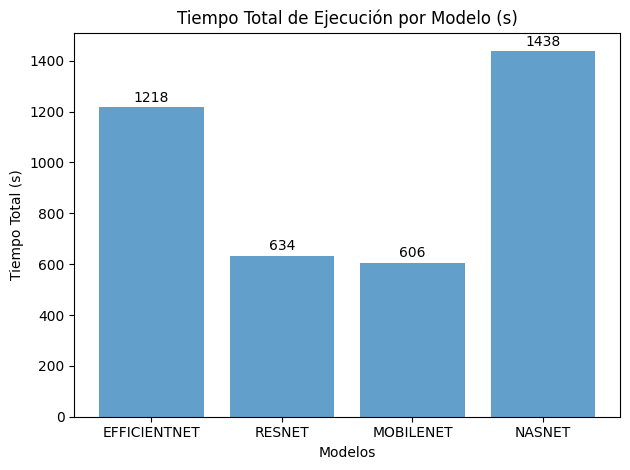

In [ ]:

# Datos de tiempos totales de ejecución para cada modelo
total_times = {model: sum(data["times"]) for model, data in models.items()}

# Nombres de los modelos
model_names = list(total_times.keys())
# Tiempos totales
total_times_values = list(total_times.values())

# Crear la gráfica de barras
fig, ax = plt.subplots()
bar_positions = np.arange(len(model_names))
ax.bar(bar_positions, total_times_values, align='center', alpha=0.7)

# Añadir etiquetas a cada barra
for i, time in enumerate(total_times_values):
    ax.text(i, time + 10, str(time), ha='center', va='bottom')

# Añadir título y etiquetas a los ejes
ax.set_title('Tiempo Total de Ejecución por Modelo (s)')
ax.set_xlabel('Modelos')
ax.set_ylabel('Tiempo Total (s)')
ax.set_xticks(bar_positions)
ax.set_xticklabels(model_names)


plt.tight_layout()
plt.show()

### ANALISIS DEL ENTRENAMIENTO DE LOS MODELOS EN TERMINOS DE PRECISIÓN Y PERDIDA EN LOS DATOS DE VALIDACIÓN

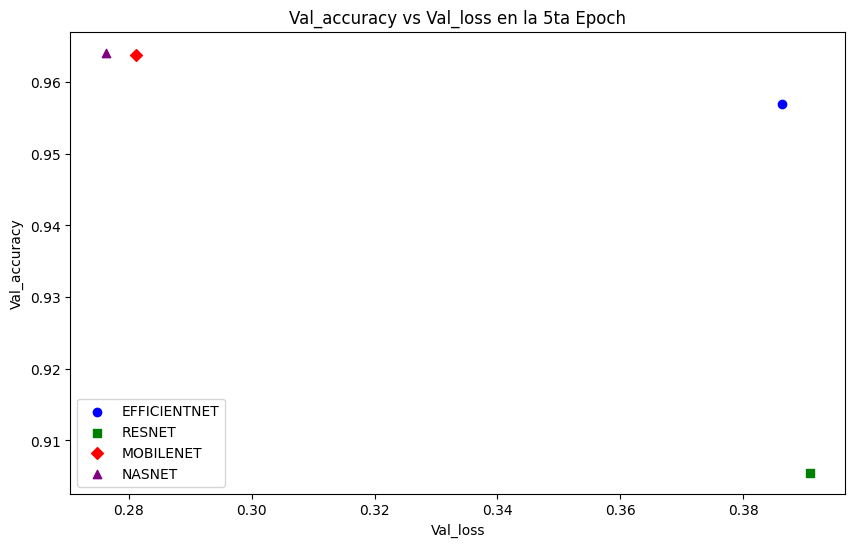

In [ ]:
# Preparar los datos de la quinta época para la gráfica de dispersión
epoch = 4
markers = ['o', 's', 'D', '^']
colors = ['blue', 'green', 'red', 'purple']

# Plot de cada modelo en la 5ta Epoch
plt.figure(figsize=(10, 6))
for (model_name, data), marker, color in zip(models.items(), markers, colors):
    plt.scatter(data['val_loss'][epoch], data['val_accuracy'][epoch], label=model_name, marker=marker, color=color)

# Etiquetas y título de la gráfica
plt.xlabel('Val_loss')
plt.ylabel('Val_accuracy')
plt.title('Val_accuracy vs Val_loss en la 5ta Epoch')

# Añadir leyenda
plt.legend()
# Mostrar la gráfica
plt.show()

### ANALISIS DEL ENTRENAMIENTO DE LOS MODELOS EN TERMINOS DE PRECISIÓN Y PERDIDA EN LOS DATOS DE ENTRENAMIENTO

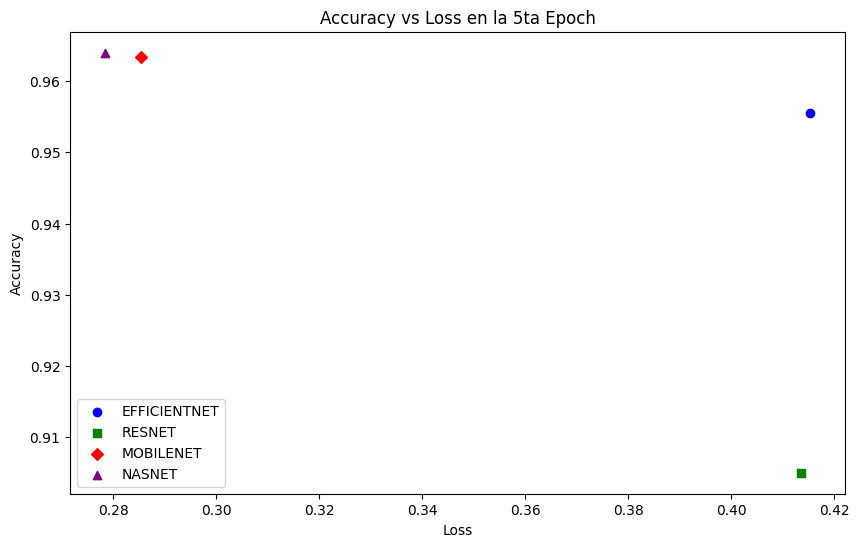

In [ ]:
# Preparar los datos de la quinta época para la gráfica de dispersión
epoch = 4  # Índice de la quinta época en los arrays (que empiezan en 0)
markers = ['o', 's', 'D', '^']  # Diferentes marcadores para cada modelo
colors = ['blue', 'green', 'red', 'purple']  # Diferentes colores para cada modelo

# Plot each model's 5th epoch accuracy vs loss
plt.figure(figsize=(10, 6))
for (model_name, data), marker, color in zip(models.items(), markers, colors):
    plt.scatter(data['loss'][epoch], data['accuracy'][epoch], label=model_name, marker=marker, color=color)

# Etiquetas y título de la gráfica
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Loss en la 5ta Epoch')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

## PRECISIÓN DE LOS MODELOS EN LOS DATOS DE PRUEBA

In [ ]:
#RESULTADOS DE LOS MODELOS CON DATA DE PRUEBA
# Datos de métricas para cada modelo
metricas_data_prueba = {
    "EFFICIENTNET": {
        "accuracy": 0.95
    },
    "RESNET": {
        "accuracy": 0.89
    },
    "MOBILENET": {
        "accuracy": 0.98
    },
    "NASNET": {
        "accuracy": 0.97
    }
}

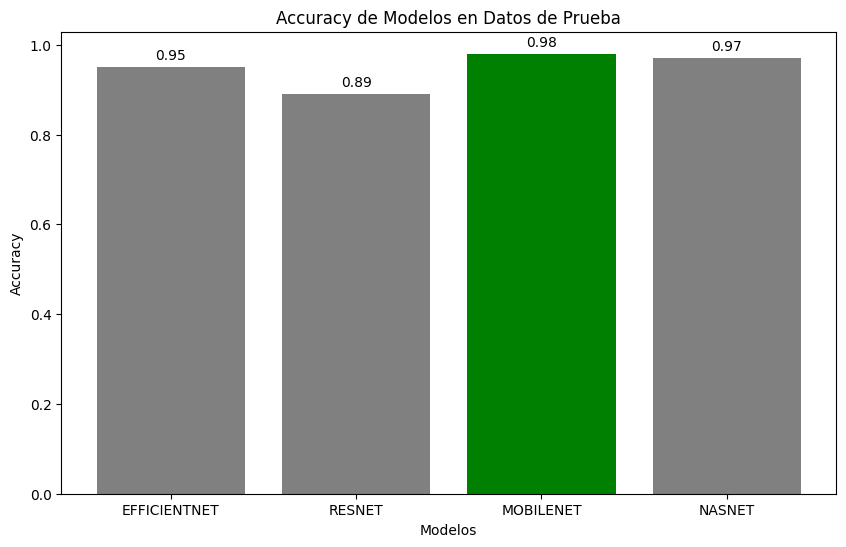

In [ ]:
# Extraer los nombres de los modelos y sus respectivas accuracies
model_names = list(metricas_data_prueba.keys())
accuracies = [metricas_data_prueba[model]['accuracy'] for model in model_names]

# Identificar la mayor accuracy
max_accuracy = max(accuracies)

# Colores para las barras
colors = ['green' if accuracy == max_accuracy else 'gray' for accuracy in accuracies]

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=colors)

# Añadir etiquetas a cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Añadir título y etiquetas a los ejes
plt.title('Accuracy de Modelos en Datos de Prueba')
plt.xlabel('Modelos')
plt.ylabel('Accuracy')

# Mostrar la gráfica
plt.show()